In [ ]:
import warnings
warnings.filterwarnings("ignore")

import time

import time
import sys
import os
import gc
import re
import time
!pip install distance
import distance
import spacy
nlp = spacy.load('en_core_web_sm')
import sqlite3
import csv
import math
#import six
import datetime as dt
from tqdm import tqdm
from os import path
from PIL import Image

import numpy as np
import pandas as pd
from collections import Counter, defaultdict

import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

from sklearn.preprocessing import MinMaxScaler

from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.ensemble import StackingClassifier

from scipy.sparse import hstack

from sqlalchemy import create_engine # database connection

import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dm_project/final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y'],   encoding='utf-8', )


In [ ]:
df.head()

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,NaN,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
1,0.0,0,0,0.999980000399992,0.8333194446759221,0.9999833336111064,0.9999833336111064,0.9166590278414348,0.7857086735094749,0.0,...,-72.26662468910217,-37.07208573818207,-31.14272952079773,94.06485383212566,-45.05324238538742,-34.155221063643694,-76.54809904098511,99.2827759385109,50.79173070192337,-17.566245555877686
2,1.0,1,0,0.7999840003199936,0.3999960000399996,0.7499812504687383,0.5999880002399952,0.6999930000699993,0.4666635555762962,0.0,...,6.193171441555023,-65.08422893285751,-15.654533937573433,-3.4758278131484985,26.999801814556122,170.17261263728142,-57.038952708244324,194.26954627037048,128.20780265331268,55.49006104469299
3,2.0,2,0,0.3999920001599968,0.3333277778703688,0.3999920001599968,0.249996875039062,0.3999960000399996,0.2857122449125363,0.0,...,-26.185226321220398,-19.283218204975128,75.60243785381317,24.144026562571526,-91.87439799308777,-178.45411258935928,-91.47148215770721,19.922719061374664,21.26668953895569,49.57485753670335
4,3.0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-17.779018878936768,30.15229707956314,49.30013710260391,27.78379452228546,25.93718773126602,-32.107075929641724,-3.8176335096359253,-14.231000423431396,4.772115111351013,7.711628437042236


In [ ]:
df_tmp1=df.drop(df.index[0])
y_true = df_tmp1['is_duplicate']
df_tmp2=df_tmp1.drop(['Unnamed: 0', 'id','is_duplicate'], axis=1)

cols = list(df_tmp2.columns)
data = pd.DataFrame(np.array(df_tmp2.values,dtype=np.float64),columns=cols)
y_true = list(map(int, y_true.values))
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [ ]:
print(y_true)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 

In [ ]:
df_tmp3= df_tmp2.drop(df_tmp2.iloc[:, 0:26], axis = 1)
df_tmp4= df_tmp2.drop(df_tmp2.iloc[:, 26:218], axis = 1)


cols_tmp3 = list(df_tmp3.columns)
data_tmp3 = pd.DataFrame(np.array(df_tmp3.values,dtype=np.float64),columns=cols_tmp3)
X_train_tmp3,X_test_tmp3, y_train_tmp3, y_test_tmp3 = train_test_split(data_tmp3, y_true, stratify=y_true, test_size=0.3)


cols_tmp4 = list(df_tmp4.columns)
data_tmp4 = pd.DataFrame(np.array(df_tmp4.values,dtype=np.float64),columns=cols_tmp4)
X_train_tmp4,X_test_tmp4, y_train_tmp4, y_test_tmp4 = train_test_split(data_tmp4, y_true, stratify=y_true, test_size=0.3)



In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

0.9239372269708324


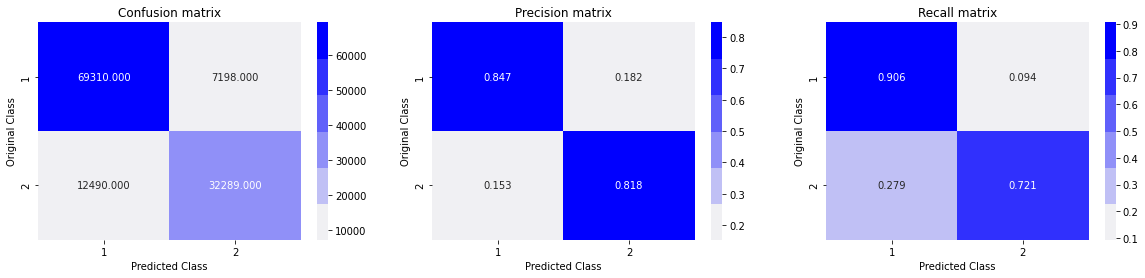

Time elapsed for model with tmp1:- 844.2920727729797


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
start = time.time()
# Create the model with 100 trees
model_tmp1 = RandomForestClassifier(n_estimators=100,bootstrap = True,max_features = 'sqrt')
# Fit on training data
model_tmp1.fit(X_train,y_train)

rf_predictions_tmp1 = model_tmp1.predict(X_test)
# Probabilities for each class

rf_probs1_tmp1 = model_tmp1.predict_proba(X_test)
rf_probs_tmp1 = rf_probs1_tmp1[:, 1]

# Calculate roc auc
roc_value_tmp1 = roc_auc_score(y_test, rf_probs_tmp1)
rf_pred_probs_tmp1 =np.argmax(rf_probs1_tmp1,axis=1)
print(roc_value_tmp1)
plot_confusion_matrix(y_test, rf_pred_probs_tmp1)
end = time.time()
print("Time elapsed for model with tmp1:-",end - start)


0.831712056064659


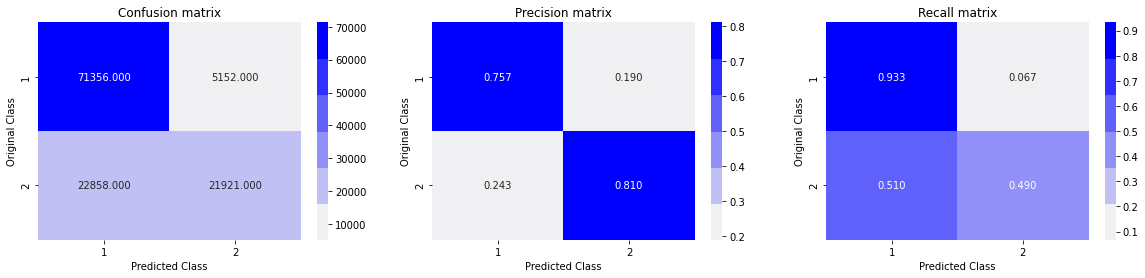

Time elapsed for model with tmp3:- 800.0626976490021


In [ ]:
start = time.time()
model_tmp3 = RandomForestClassifier(n_estimators=100,bootstrap = True,max_features = 'sqrt')
model_tmp3.fit(X_train_tmp3,y_train_tmp3)
rf_predictions_tmp3 = model_tmp3.predict(X_test_tmp3)

rf_probs1_tmp3 = model_tmp3.predict_proba(X_test_tmp3)
rf_probs_tmp3 = rf_probs1_tmp3[:, 1]

roc_value_tmp3 = roc_auc_score(y_test_tmp3, rf_probs_tmp3)

print(roc_value_tmp3)
rf_pred_probs_tmp3 =np.argmax(rf_probs1_tmp3,axis=1)
plot_confusion_matrix(y_test_tmp3, rf_pred_probs_tmp3)
end = time.time()
print("Time elapsed for model with tmp3:-",end - start)

0.9208321013496404


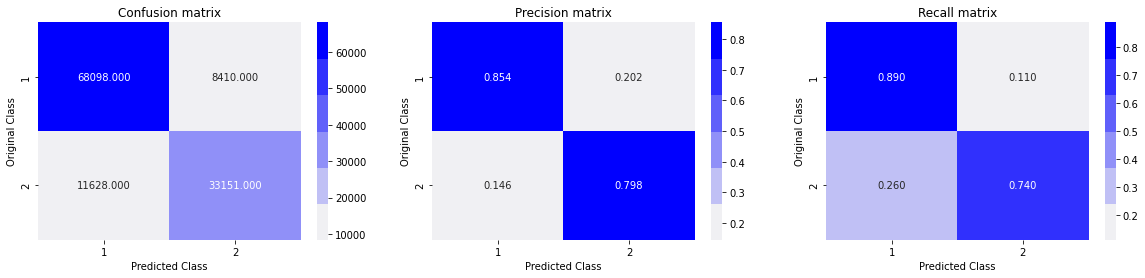

Time elapsed for model with tmp4:- 96.79973316192627


In [ ]:
start = time.time()
model_tmp4 = RandomForestClassifier(n_estimators=100,bootstrap = True,max_features = 'sqrt')
model_tmp4.fit(X_train_tmp4,y_train_tmp4)


rf_predictions_tmp4 = model_tmp4.predict(X_test_tmp4)
rf_probs1_tmp4 = model_tmp4.predict_proba(X_test_tmp4)
rf_probs_tmp4 = rf_probs1_tmp4[:, 1]
roc_value_tmp4 = roc_auc_score(y_test_tmp4, rf_probs_tmp4)

print(roc_value_tmp4)
rf_pred_probs_tmp4 =np.argmax(rf_probs1_tmp4,axis=1)
plot_confusion_matrix(y_test_tmp4, rf_pred_probs_tmp4)
end = time.time()
print("Time elapsed for model with tmp4:-",end - start)

In [ ]:
import pickle

filename = '/content/drive/MyDrive/dm_project/finalized_model_rf_tmp.sav'
pickle.dump(model_tmp1, open(filename, 'wb'))

filename = '/content/drive/MyDrive/dm_project/finalized_model_rf_tmp3.sav'
pickle.dump(model_tmp3, open(filename, 'wb'))

filename = '/content/drive/MyDrive/dm_project/finalized_model_rf_tmp4.sav'
pickle.dump(model_tmp4, open(filename, 'wb'))

In [ ]:

df_tmp5= df_tmp4.drop(df_tmp2.iloc[:, 0:15], axis = 1)
df_tmp6= df_tmp4.drop(df_tmp2.iloc[:, 15:26], axis = 1)


cols_tmp5 = list(df_tmp5.columns)
data_tmp5 = pd.DataFrame(np.array(df_tmp5.values,dtype=np.float64),columns=cols_tmp5)
X_train_tmp5,X_test_tmp5, y_train_tmp5, y_test_tmp5 = train_test_split(data_tmp5, y_true, stratify=y_true, test_size=0.3)


cols_tmp6 = list(df_tmp6.columns)
data_tmp6 = pd.DataFrame(np.array(df_tmp6.values,dtype=np.float64),columns=cols_tmp6)
X_train_tmp6,X_test_tmp6, y_train_tmp6, y_test_tmp6 = train_test_split(data_tmp6, y_true, stratify=y_true, test_size=0.3)




In [ ]:
df_tmp5.head()

In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

0.8637791813758106


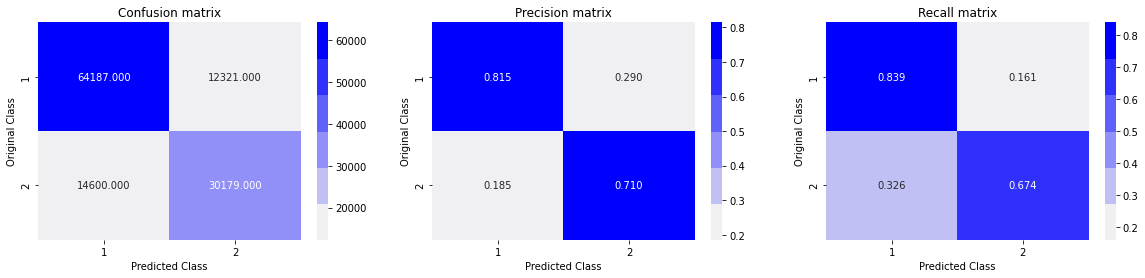

Time elapsed for model with tmp6:- 60.542548418045044


In [ ]:
start = time.time()

model_tmp5 = RandomForestClassifier(n_estimators=100,bootstrap = True,max_features = 'sqrt')
model_tmp5.fit(X_train_tmp5,y_train_tmp5)


rf_predictions_tmp5 = model_tmp5.predict(X_test_tmp5)
rf_probs1_tmp5 = model_tmp5.predict_proba(X_test_tmp5)
rf_probs_tmp5 = rf_probs1_tmp5[:, 1]
roc_value_tmp5 = roc_auc_score(y_test_tmp5, rf_probs_tmp5)

print(roc_value_tmp5)
rf_pred_probs_tmp5 =np.argmax(rf_probs1_tmp5,axis=1)
plot_confusion_matrix(y_test_tmp5, rf_pred_probs_tmp5)
end = time.time()
print("Time elapsed for model with tmp6:-",end - start)

0.8475200670165193


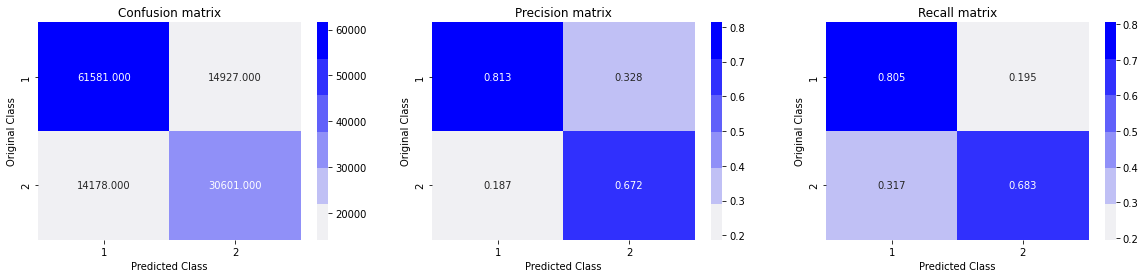

Time elapsed for model with tmp6:- 73.02507257461548


In [ ]:
start = time.time()
model_tmp6 = RandomForestClassifier(n_estimators=100,bootstrap = True,max_features = 'sqrt')
model_tmp6.fit(X_train_tmp6,y_train_tmp6)


rf_predictions_tmp6 = model_tmp6.predict(X_test_tmp6)
rf_probs1_tmp6 = model_tmp6.predict_proba(X_test_tmp6)
rf_probs_tmp6 = rf_probs1_tmp6[:, 1]
roc_value_tmp6 = roc_auc_score(y_test_tmp6, rf_probs_tmp6)

print(roc_value_tmp6)
rf_pred_probs_tmp6 =np.argmax(rf_probs1_tmp6,axis=1)
plot_confusion_matrix(y_test_tmp6, rf_pred_probs_tmp6)
end = time.time()
print("Time elapsed for model with tmp6:-",end - start)